# The Unexpected Joy of (Analyzing) the Central Park Squirrel Census

## Summary
In this project, Python was used to analyze the dataset from the 2018 Central Park Squirrel Census. The point of the project was to analyze and visualize how squirrels with different fur colors reacted to human encounters during the census.

## Data 
The data was extracted from the NYC Open Data website: https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw. 

The dataset was downloaded as a CSV file under the name “2018_Central_Park_Squirrel_Census”.

Given the size of the dataset itself, it was necessary to work on a dataframe which held only information relevant to this analysis; mainly, the data under the following columns: 
* “Primary Fur Color”: Contains three categorical values: “Gray”, “Cinnamon” and “Black” 
* “Approaches”: True/False value depending on whether the squirrel approached the person doing the census.
* “Indifferent”: True/False value depending on whether the squirrel acted indifferent towards the person doing the census.
* “Runs from”: True/False value depending on whether the squirrel ran from the person doing the census.


In [353]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [354]:
squirrels = pd.read_csv("2018_Central_Park_Squirrel_Census.csv")

In [355]:
squirrels.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


The 2018 census covered a total of 2968 squirrels. Of these:
* 2473 were gray
* 392 were cinnamon
* 103 were black

In [356]:
print('Total squirrels: ' +str(squirrels['Primary Fur Color'].count()))
print(str(squirrels['Primary Fur Color'].value_counts()))

Total squirrels: 2968
Primary Fur Color
Gray        2473
Cinnamon     392
Black        103
Name: count, dtype: int64


## Analysis
The squirrels were grouped by colors and their responses were aggregated into sums of "succeses" for each.

* 178 squirrels approached humans during the census
    * 6 black
    * 44 cinnamon
    * 126 gray
    * 2 non-determined
* 678 squirrels ran from humans during the census
  * 32 black
  * 87 cinnamon
  * 551 gray
  * 8 non-determined
* 1454 squirrels acted indifferent towards humans during the census
  * 44 black
  * 181 cinnamon
  * 1219 gray
  * 10 non-determined

In [357]:
print('Approaches: ' + str((squirrels['Approaches']==True).sum()))
print('Indifferent: ' + str((squirrels['Indifferent']==True).sum()))
print('Runs from: ' + str((squirrels['Runs from']==True).sum()))

Approaches: 178
Indifferent: 1454
Runs from: 678


In [358]:
squirrel_colors_sum = squirrels.groupby('Primary Fur Color').agg({'Approaches':'sum', 'Indifferent':'sum', 'Runs from': 'sum'})

In [359]:
squirrel_colors_sum

,Approaches,Indifferent,Runs from
Primary Fur Color,,,
Black,6,44,32
Cinnamon,44,181,87
Gray,126,1219,551


* The overall rate of approaches during the census was of  5.9%
    * Rate of approaches for black squirrels was 5.8%
    * For cinnamon squirrels was 11.2%
    * For gray squirrels 5.1%
* Overall rate of indifference was 48.1%
  * Rate of indifference for black squirrels was 42.7%
  * For cinnamon squirrels 46.2%
  * For Gray squirrels 49.3%
* Overall rate of escape (running from) was 22.4%
    * Escape rate for black squirrels was 31.1%
    * For cinnamon squirrels, 22.2%
    * For gray squirrels, 22.3%

In [360]:
print('Approaches mean: ' + str(squirrels['Approaches'].mean()))
print('Indifferent mean: ' + str(squirrels['Indifferent'].mean()))
print('Runs from: ' + str(squirrels['Runs from'].mean()))

Approaches mean: 0.058881905391994706
Indifferent mean: 0.4809791597750579
Runs from: 0.22428051604366522


In [361]:
squirrels_colors_mean = squirrels.groupby('Primary Fur Color').agg({'Approaches':'mean', 'Indifferent':'mean', 'Runs from': 'mean'})
squirrels_colors_mean.loc['Overall'] = [0.058881905391994706,  0.4809791597750579, 0.22428051604366522]
squirrels_colors_mean

,Approaches,Indifferent,Runs from
Primary Fur Color,,,
Black,0.058252,0.427184,0.310680
Cinnamon,0.112245,0.461735,0.221939
Gray,0.050950,0.492924,0.222806
Overall,0.058882,0.480979,0.224281


## Visualizing
The data was visualized with a trio of bar charts, each representing the mean of responses for each squirrel color. The charts were fed the data from squirrels_colors_mean, as arrays, and multiplied by 100.

In [362]:
array_approaches_mean = np.array(squirrels_colors_mean['Approaches']) * 100
array_indifferent_mean = np.array(squirrels_colors_mean['Indifferent']) * 100
array_runsfrom_mean = np.array(squirrels_colors_mean['Runs from']) * 100
bar_colors = ['black', 'saddlebrown', 'slategrey', 'olive']

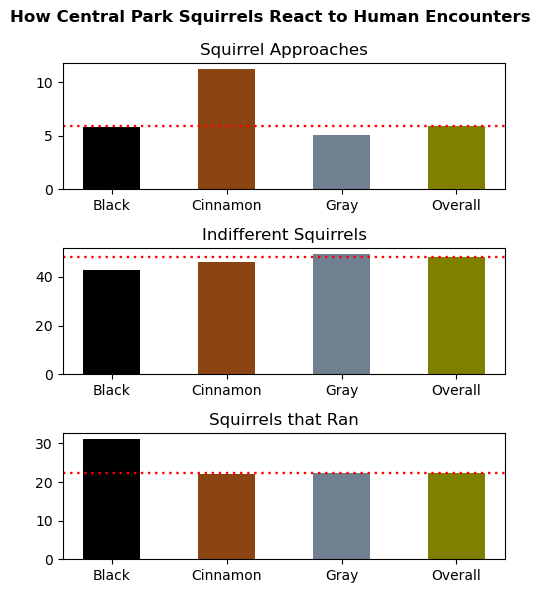

In [376]:

plt.figure(figsize=(5,6), tight_layout=True, edgecolor='black')
plt.suptitle('How Central Park Squirrels React to Human Encounters', fontweight='heavy')

plt.subplot(3,1,1)
plt.bar(x=chart_labels, height=array_approaches_mean, color=bar_colors, width = 0.5)
plt.axhline(y =5.9, xmin =0, xmax=1, linewidth=1.7, color = 'red', dashes=(1,2))
plt.title('Squirrel Approaches')

plt.subplot(3,1,2)
plt.bar(x=chart_labels, height=array_indifferent_mean, color=bar_colors, width = 0.5)
plt.axhline(y =48.1, xmin =0, xmax=1, linewidth=1.7, color = 'red', dashes=(1,2))

plt.title('Indifferent Squirrels')

plt.subplot(3,1,3)
plt.bar(x=chart_labels, height=array_runsfrom_mean, color=bar_colors, width = 0.5)
plt.axhline(y =22.4, xmin =0, xmax=1, linewidth=1.7, color = 'red', dashes=(1,2))
plt.title('Squirrels that Ran')

plt.savefig('Squirrel_Census_Reactions.png', format='png', dpi=129, bbox_inches='tight')

plt.show()

Indifferent responses for each squirrel color were pretty close to the overall indifferent response. However, there were noticeable differences in escapes and approaches.
* Cinnamon squirrels approached humans at a rate that doubles the overall and the rest of the squirrels.
* There was a 10 percentage point difference between the average for black squirrel escapes when compared to the overall and the rest of the squirrels.

## Hypo testing
A 2 sample T-test was executed to determine whether there was a correlation between a squirrel's fur color and whether it approached or ran away from humans during the census. In particular, it was asked if:
* There's any significance to the higher rate of approaches by cinnamon squirrels, or was it a matter of random chance.
* There's any significance to the higher rate of escapes by black squirrels, or was it a matter of random chance.

Null hypothesis for both would point to random chance as the difference in rates between the responses of specified colored squirrels and the overall response.

### Cinnamon Squirrel Approaches 2 Sample T-Test

In [374]:
cinnamon_sample_1 = squirrels['Approaches']

mask_1 = squirrels['Primary Fur Color'] == 'Cinnamon'
cinnamon_sample_2 = squirrels[mask_1]
cinnamon_sample_2 = cinnamon_sample_2['Approaches']

tstat, pval = ttest_ind(cinnamon_sample_1, cinnamon_sample_2)
print(pval)

5.4522329064122926e-05


P-value for the test was 5.4522329064122926e-05, or 0.000054522329064122926, or 0.005%. <br>
Null hypothesis is thus rejected, which points to a potential correlation between cinnamon squirrels' fur color and their propensity to approach humans at a higher rate than the overall mean during the 2018 Central Park Census. 

### Black Squirrel Escapes 2 Sample T-Test

In [375]:
black_sample_1 = squirrels['Runs from']

black_mask_1 = squirrels['Primary Fur Color'] == 'Black'
black_sample_2 = squirrels[black_mask_1]
black_sample_2 = black_sample_2['Runs from']

tstat, pval = ttest_ind(black_sample_1, black_sample_2)
print(pval)

0.039593847841915504


P-value for the test was 0.039593847841915504, or 3.96%. <br>
Null hypothesis is thus rejected, which points to a potential correlation between black squirrels' fur color and their propensity to run away from humans at a higher rate than the overall mean during the 2018 Central Park Census.

## Conclusion
More data would be needed to determine if there's an overall correlation between a squirrel's fur color and its timidity in human encounters. Perhaps a look at other Central Park Squirrel censuses would be in order.

There's also a chance that other factors affected squirrels' responses to human encounters during the census, like the area they were located in, their age or if the encounter happened while the squirrel was on the ground or above it.